In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from collections import defaultdict
from surprise import SVD
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [84]:
#Loading Data files
p_d1 = pd.read_csv('phone_user_review_file_1.csv', encoding='iso-8859-1')
p_d2 = pd.read_csv('phone_user_review_file_2.csv', encoding='iso-8859-1')
p_d3 = pd.read_csv('phone_user_review_file_3.csv', encoding='iso-8859-1')
p_d4 = pd.read_csv('phone_user_review_file_4.csv', encoding='iso-8859-1')
p_d5 = pd.read_csv('phone_user_review_file_5.csv', encoding='iso-8859-1')
p_d6 = pd.read_csv('phone_user_review_file_6.csv', encoding='iso-8859-1')   

In [85]:
p_d1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [86]:
p_d2.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [87]:
p_d3.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [88]:
p_d4.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [89]:
p_d5.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [90]:
p_d6.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [91]:
p_d1.shape

(374910, 11)

In [92]:
p_d2.shape

(114925, 11)

In [93]:
p_d3.shape

(312961, 11)

In [94]:
p_d4.shape

(98284, 11)

In [95]:
p_d5.shape

(350216, 11)

In [96]:
p_d6.shape

(163837, 11)

Merge all the csv into one.

In [97]:
p_final = pd.concat([p_d1,p_d2,p_d3,p_d4,p_d5,p_d6],axis=0)

In [98]:
p_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [99]:
p_final.shape

(1415133, 11)

In [100]:
p_final.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


#Check for null values

In [101]:
p_final.isnull().values.any() 

True

In [102]:
p_final.isnull().sum()  

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [103]:
# filling the null values in column 'score' and 'score_max' 
p_final = p_final.fillna(p_final.median())

drop null values from extract,author columns

In [104]:
p_final = p_final.dropna()

In [105]:
# 1c. Round oﬀ scores to the nearest integers. 
p_final['score'] = p_final['score'].astype(int) 
p_final['score_max'] = p_final['score_max'].astype(int) 

In [106]:
p_final.shape

(1336416, 11)

In [107]:
# 1e. Check for duplicate values and remove them if there is any. 
p_duplicate = p_final.drop_duplicates()

Drop irrelevant features. Keep features like Author, Product, and Score. 

In [108]:
p_duplicate.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [109]:
p_duplicate.shape

(1331600, 3)

Keep only 1000000 data samples. Use random state=612

In [110]:
df = p_duplicate.sample(n=1000000, random_state=612)

In [111]:
df.shape

(1000000, 3)

Identify the most rated features.

In [112]:
df.groupby('product')['score'].mean().sort_values(ascending=False).head() 

product
Nokia 5310 Xpress Music, sakura red sim-free unbranded kein Vertrag    10.0
Oppo Find 5 X909 16 Gb White Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½                          10.0
Sony Ericsson W880i Prepay Mobile Phone On Orange                      10.0
Huawei Mobiltelefoner Mate 8 Dual SIM 32GB                             10.0
Huawei NOVA 4G MYSTIC SILVER                                           10.0
Name: score, dtype: float64

Identify the users with most number of reviews

In [114]:
(df['author'].value_counts()).head()

Amazon Customer    57765
Cliente Amazon     14564
e-bit               6309
Client d'Amazon     5720
Amazon Kunde        3624
Name: author, dtype: int64

In [115]:
df['product'].value_counts().head()

Lenovo Vibe K4 Note (White,16GB)     3908
Lenovo Vibe K4 Note (Black, 16GB)    3234
OnePlus 3 (Graphite, 64 GB)          3128
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

Authors who gave greater than 50 ratings

In [117]:
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=df['author'].value_counts().index.tolist() 
df1['a_count'] = list(df['author'].value_counts() > 50)

In [118]:
index_names = df1[ df1['a_count'] == False ].index 
df1.drop(index_names, inplace = True) 
df1

,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
674,eduardo,True
675,ugurcam,True
676,Rohit,True
677,Dee,True


extracting product that got more than 50 ratings

In [119]:
df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=df['product'].value_counts().index.tolist() 
df2['p_count'] = list(df['product'].value_counts() > 50)

In [120]:
index_names = df2[ df2['p_count'] == False ].index 
df2.drop(index_names, inplace = True)

In [121]:
df2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4341,LG L40 D170,True
4342,"Wiko Fever Smartphone dÃ©bloquÃ© 4G (Ecran: 5,...",True
4343,Samsung Galaxy S6 Edge 32GB G925F Black,True
4344,Samsung SGH-i900 Omnia (Navi-Vollversion D-A-C...,True


selecting data rows where product is having more than 50 ratings. 

In [122]:
df3 = df[df['product'].isin(df2['product'])] 
df3

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
116623,10,David B,Samsung S3350 Chat 335 Sim Free Mobile Phone
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
...,...,...,...
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...
281625,8,Patrix,"Huawei Ascend G510 Smartphone Touch, Fotocamer..."
110881,2,Amazon Customer,"Apple iPhone 5C Factory Unlocked Cellphone, 8G..."
36197,10,majere1975,"Samsung Smartphone Galaxy S Advance, Display 4..."


In [123]:
df4 = df3[df3['author'].isin(df1['author'])]
df4

,score,author,product
35333,10,Sebastian,"Samsung E1190 Handy (3,6 cm (1,43 Zoll) Displa..."
290678,8,sara,"Samsung SM-N910F Galaxy Note 4 Smartphone, 32 ..."
101404,10,ÐÐ²Ð³ÐµÐ½Ð¸Ð¹,Sony Xperia Z1 Compact (Ð»Ð°Ð¹Ð¼)
223332,8,Amazon Customer,Motorola Moto G 3rd Generation SIM-Free Smartp...
361379,10,e-bit,Smartphone Motorola Moto G 4 Play XT1603
...,...,...,...
21110,2,Amazon customer,Tracfone Motorola Moto E Android Prepaid Phone...
321740,8,Qantas,Sony Ericsson K810i Cyber-shot
269553,9,Capyto,Samsung M150 Cep Telefonu
87173,8,Javier,Huawei Ascend Y330 - Smartphone libre Android ...


Final shape of dataset.

In [124]:
df4.shape


(108983, 3)

#**Build a popularity based model and recommend top 5 mobile phones.**

mean score for a product by grouping it

In [125]:
mean_count = pd.DataFrame(df.groupby('product')['score'].mean()) 

calculating the number of ratings a product got

In [126]:
mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count())

Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 

In [127]:
mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,132
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,131
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,127
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,126


In [128]:
data_pb = df

In [129]:
df

,score,author,product
104246,10,Paul B,Samsung i897 Captivate Android Smartphone Gala...
78693,10,Yuvraj,"Blu Win JR LTE (Grey, 4GB)"
109329,10,Pankaj Bhalla,"Lenovo P780 (Deep Black, 4GB)"
64164,6,Bgrazina,Samsung Galaxy XCover 2
8816,2,Joyce D. Pratt,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl..."
...,...,...,...
70406,4,Dudls,Nokia 301 Dual
16189,8,Cintaaa__,LG Viewty KU990
99081,10,ALBERT M. MASSILLON,BLU Dash JR K Smartphone - Unlocked - Black
102484,2,Amazon Customer,Samsung Galaxy S6 SM-G920F 32GB (FACTORY UNLOC...


#**Build a collaborative filtering model using SVD.**

arrange columns in the order of user id,item id and rating to be fed in the svd.

In [130]:
columns_titles = ['author','product','score']
p_df = p_duplicate.reindex(columns=columns_titles)

Keep only 5000 data samples. Use random state=612

In [131]:
phone_data = p_df.sample(n=5000, random_state=612)

Build a collaborative filtering model using SVD. 

In [132]:
reader = Reader(rating_scale=(1, 10))

In [133]:
data = Dataset.load_from_df(phone_data,reader = reader)


In [134]:
trainset = data.build_full_trainset()

In [135]:
trainset.ur

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 10.0)],
             2: [(2, 10.0)],
             3: [(3, 6.0)],
             4: [(4, 2.0)],
             5: [(5, 10.0)],
             6: [(6, 10.0), (1363, 10.0)],
             7: [(7, 10.0)],
             8: [(8, 8.0), (465, 9.0)],
             9: [(9, 8.0)],
             10: [(10, 10.0)],
             11: [(11, 2.0)],
             12: [(12, 8.0)],
             13: [(13, 8.0)],
             14: [(14, 10.0)],
             15: [(15, 10.0)],
             16: [(16, 2.0)],
             17: [(17, 8.0)],
             18: [(18, 10.0)],
             19: [(19, 9.0)],
             20: [(20, 8.0)],
             21: [(21, 10.0),
              (909, 9.0),
              (2202, 6.0),
              (2551, 10.0),
              (3378, 9.0),
              (3614, 10.0)],
             22: [(22, 2.0)],
             23: [(23, 10.0)],
             24: [(24, 8.0)],
             25: [(25, 10.0)],
             26: [(26, 10.0)],
             27:

In [136]:
result = SVD()
result.fit(trainset)

In [137]:
testset = trainset.build_anti_testset()

In [138]:
predictions = result.test(testset)

In [139]:
predictions

[Prediction(uid='Paul B', iid='Blu Win JR LTE (Grey, 4GB)', r_ui=8.0086, est=8.431343101042195, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Lenovo P780 (Deep Black, 4GB)', r_ui=8.0086, est=8.158553916258942, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung Galaxy XCover 2', r_ui=8.0086, est=8.01816341636817, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='BLU Vivo XL Smartphone - 5.5" 4G LTE - GSM Unlocked - Solid Gold', r_ui=8.0086, est=8.03281314166924, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung S3350 Chat 335 Sim Free Mobile Phone', r_ui=8.0086, est=8.37654670578355, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='Samsung E1190 Handy (3,6 cm (1,43 Zoll) Display, Dual-Band) titan gray', r_ui=8.0086, est=8.191634299870659, details={'was_impossible': False}),
 Prediction(uid='Paul B', iid='LG Nexus 4 Smartphone, Nero [Italia]', r_ui=8.0086, est=8.619050834412475, detai

In [140]:
print("SVD Model : Test Set")
accuracy.rmse(predictions, verbose=True)

SVD Model : Test Set
RMSE: 0.3370


0.3370463226027454

In [141]:
cross_validate(result, data, measures=['RMSE'], cv=3, verbose=False)

{'fit_time': (0.22470903396606445, 0.22504234313964844, 0.2423689365386963),
 'test_rmse': array([2.5700912 , 2.55634566, 2.64507509]),
 'test_time': (0.011742353439331055,
  0.013836860656738281,
  0.01593923568725586)}

**RMSE of SVD model is lower than for cross validation.**

#**Build a collaborative filtering model using kNNWithMeans from surprise using Item based model**

In [142]:
reader = Reader(rating_scale=(1, 10))
data01 = Dataset.load_from_df(phone_data,reader = reader)

In [143]:
trainset_I, testset_I = train_test_split(data01, test_size=.15)

In [144]:
algorithm = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algorithm.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [146]:
test_pred_I = algorithm.test(testset_I)

In [147]:
test_pred_I

[Prediction(uid='Maris', iid='Doogee Y6 Smartphone 4G, Pantalla 5.5inch HD, 1280*720px MTK6750 64-Bit Octa-core, 2GBRam, 16GBRom, Android 6.0 13.0MP+8.0MP Dual CÃ¡mara Huella Digital Hotknot OTA GPS', r_ui=10.0, est=8.016, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='huawei p8 lite black', iid='Huawei P8lite zwart / 16 GB', r_ui=9.0, est=8.016, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ZÃ¡kaznÃ\xadk', iid='BlackBerry Classic QWERTY Black', r_ui=9.0, est=8.016, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Stefy1986', iid='Nokia N70', r_ui=8.0, est=8.016, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Mikele', iid="Alcatel One Touch Pop 3 (5) Smartphone, Dual SIM, Display 5' Pollici, 8 GB Memoria interna, 1Gb RAM, Fotocamera da 5 Megapixel con autofocus e flash LED, Android 5.1 Lollipop, Nero/P

In [148]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_I, verbose=True)

Item-based Model : Test Set
RMSE: 2.7075


2.7075005490484494

#**Build a collaborative filtering model using kNNWithMeans from surprise using User based model**

In [149]:
reader = Reader(rating_scale=(1, 10))
data02 = Dataset.load_from_df(phone_data,reader = reader)

In [150]:
trainset_U, testset_U = train_test_split(data02, test_size=.15)

In [151]:
algorithm = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algorithm.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [153]:
uid = 'Frances DeSimone'  # raw user id
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.'  # raw item id

In [155]:
pred = algorithm.predict(uid, iid, verbose=True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. r_ui = None   est = 8.04   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [157]:
test_pred_U = algorithm.test(testset_U)

In [158]:
test_pred_U

[Prediction(uid='simovit', iid='Ericsson T28', r_ui=8.0, est=8.035058823529411, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Reinhard', iid='Samsung Star II S5260 Smartphone (7,62 cm (3 Zoll) Touchscreen, 3MP Kamera, MP3-Player, WLAN, Bluetooth, t9-Trace) onyx-black', r_ui=6.0, est=8.035058823529411, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Ð¸Ð³Ð¾Ñ\x80Ñ\x8c', iid='Samsung i5500 Galaxy 550', r_ui=6.0, est=8.035058823529411, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Debasish Chatterjee', iid='Samsung Galaxy J2 2016 SM-J210FZDDINS (Gold, 8GB) - Scheduled/4 Hour Delivery (Brand Fulfilled)', r_ui=8.0, est=8.035058823529411, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Bevan2001', iid='Apple iPhone 7 Unlocked Phone 32 GB - US Version (Gold)', r_ui=2.0, est=8.035058823529411, details={'was_imp

In [159]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred_U, verbose=True)

User-based Model : Test Set
RMSE: 2.6885


2.688497879599537

The prediction of user item combinations and the estimated ratings.

In [160]:
d_df = df
df.shape

(1000000, 3)

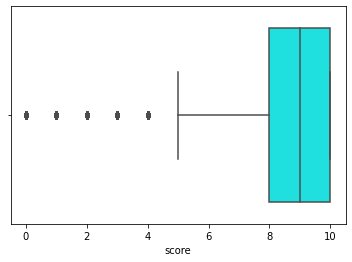

Boxplot of score
number of outliers are: 147884


In [164]:
sns.boxplot(x= d_df['score'], color='cyan')
plt.show()
print('Boxplot of score')
Q1 = d_df['score'].quantile(0.25)
Q2 = d_df['score'].quantile(0.50)
Q3 = d_df['score'].quantile(0.75) 
IQR = Q3 - Q1
L_W = (Q1 - 1.5 *IQR)
U_W = (Q3 + 1.5 *IQR)    
bools = (d_df['score'] < (Q1 - 1.5 *IQR)) |(d_df['score'] > (Q3 + 1.5 * IQR))
print('number of outliers are:',bools.sum())

The number of outliers are :147884

In [166]:
cross_validate(algorithm,data02, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'fit_time': (0.3516824245452881, 0.3396773338317871, 0.3376009464263916),
 'test_rmse': array([2.60480001, 2.60834563, 2.62618337]),
 'test_time': (0.013059139251708984,
  0.012675762176513672,
  0.012495279312133789)}

#Conclusion:-Samsung Galaxy Note5 is the most popular product Amazon Customer is the most active author who writes reviews. Lenovo Vibe K4 Note (White,16GB) was rated by most of the authors CV rmse was 2.5

Question: In what business scenario you should use popularity based Recommendation Systems ?


Ans: Following are some scenarios where we can use recommendation system.
1.There are very few ways to achieve increased sales without increased marketing effort. Once you setup an automated recommendation system, you get recurring additional sales without any effort.
2.By getting customers to spend more on your website, you can increase their familiarity with your brand and user interface, increasing their probability to make future purchases from you. 
3.Similar to e-commerce, media businesses are one of the first to jump into recommendations. It is difficult to see a news site without a recommendation system.

Question: In what business scenario you should use CF based Recommendation Systems ? 

Ans: Collaborative Filtering is used to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected.
examples: 
1.Amazon.com
2.You-tube
3.Netflix

Question: What other possible methods can you think of which can further improve the recommendation for different users ?

Ans: 4 practical steps to improve scalability and quality in front of users.

1 — Ditch Your User-Based Collaborative Filtering Model. ...

2 — A Gold Standard Similarity Computation Technique. ...

3 — Boost Your Algorithm Using Model Size. ...

4 — What Drives Your Users, Drives Your Success.